# Chapter 22: Ordinary Differential Equation - Initial Value Problems (Continued)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numpy.linalg import inv
from scipy.integrate import solve_ivp

## 22.4: Numerical Error and Instability

There are two main issues to consider with regard to integration schemes for ODEs: accuracy and stability. Accuracy is the ability to get close to the exact solution as a function of step size $h$. Stability is its ability to keep the error from growing as it integrates forward in time. If the error does not grow it is stable, else it is unstable.

Below is an example of the Eurler explicit, Euler implicit, and Trapezoidal formulas to solve the pendulum equation of $t=[0,5]$ in increments of $0.01$ with $S_0=\begin{bmatrix}1 \\ 0 \end{bmatrix}$. For the model parameters using $\sqrt{\frac{g}{l}}=4$

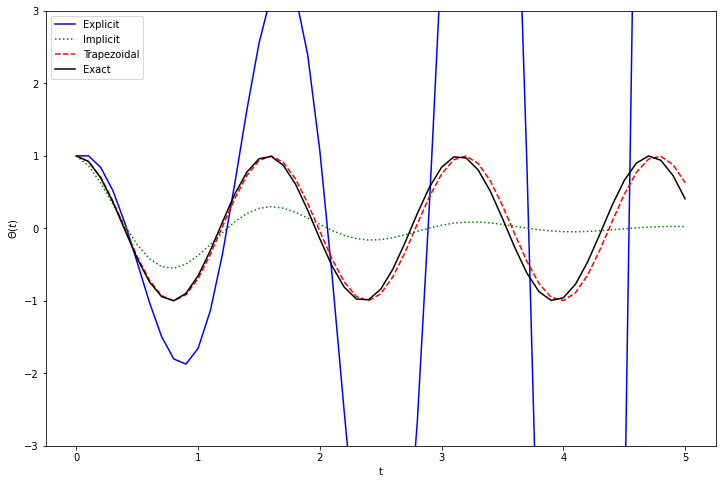

In [12]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

## 22.5: Predictor-Corrector Methods

Predictor-Corrector methods of solving intial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the $F$ function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state. Essentially it uses a predictor formula and a corrector formula.

The predictor is an explicit formula and first estimates the solution at $t_{j+1}$, therefore we can use the Euler method to finish this step.

After we finish the predictor, we can improve accuracy with a corrector.

Runge Kutta methods are one of the most widely used methods for solving ODEs. Recall that the Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear: $$S(t_{j+1})=S(t_j+h)=S(t_j)+h\cdot S'(t_j)$$
We can greatly improve the accuracy of numerical integration if we keep more terms of the series in. In order to get this more accurate solution, we need to derive the expression of $S''(t-j),S'''(t_j),...,S^{(n)}(t_j)$. This extra work can be avoided using teh Runge Kutta methods, which is based on truncated Taylor series, but not require computation of these higher derivatives.

### Second Order Runge Kutta

We can only solve first order ODEs using the second order Runge Kutta method.

We have $$S(t_{j+1})=S_(t_j)+\frac{1}{2}(k_1+k_2)h$$ where $k_1=h\cdot f(t_j,S(t_j))$ and $k_2=h\cdot f((t_j+\frac{h}{2}),(S(t_j)+\frac{k_1\cdot h}{2}))$

In [13]:
# A sample differential equation
# "dy/dx = (x - y)/2"
def dydx(x, y) :
 
    return (x + y - 2);
 
# Finds value of y for a given x
# using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h) :
 
    # Count number of iterations
    # using step size or
    # step height h
    n = round((x - x0) / h);
     
        # Iterate for number of iterations
    y = y0;
     
    for i in range(1, n + 1) :
         
                # Apply Runge Kutta Formulas
        # to find next value of y
        k1 = h * dydx(x0, y);
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1);
 
        # Update next value of y
        y = y + (1.0 / 6.0) * (k1 + 2 * k2);
 
        # Update next value of x
        x0 = x0 + h;
 
    return y;
 
# Driver Code
if __name__ == "__main__" :
 
    x0 = 0; y = 1;
    x = 2; h = 0.2;
 
    print("y(x) =",rungeKutta(x0, y, x, h));

y(x) = 0.6455901672629244


###Fourth Order Runge Kutta

For fourth order, we have $$S(t_{j+1})=S(t_j)+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$$ where $k_1=h\cdot f(t_j,S(t_j))$, $k_2=h\cdot f(t_j+\frac{h}{2},S(t_j)+\frac{k_1}{2})$, $k_3=h\cdot f(t_j+\frac{h}{2},S(t_j)+\frac{k_2}{2})$, and $k_4=h\cdot f(t_j+h,S(t_j)+k_3)$

In [14]:
# A sample differential equation "dy / dx = (x - y)/2"
def dydx(x, y):
    return ((x - y)/2)
 
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h):
    # Count number of iterations using step size or
    # step height h
    n = (int)((x - x0)/h)
    # Iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)
 
        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        # Update next value of x
        x0 = x0 + h
    return y
 
# Driver method
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h))

The value of y at x is: 1.1036393232374955


##22.6: Python ODE Solvers

A common ODE solver is SciPy's `solve_ivp` under their integrate category.

Consider the ODE $$\frac{dS(t)}{dt}=cos(t)$$ with $S_0=0$. The exact solution is $S(t)=sin(t)$. We will illistrate `solve_ivp`'s solution with $t=[0,2\pi]$ and also plot the error to the exact solution

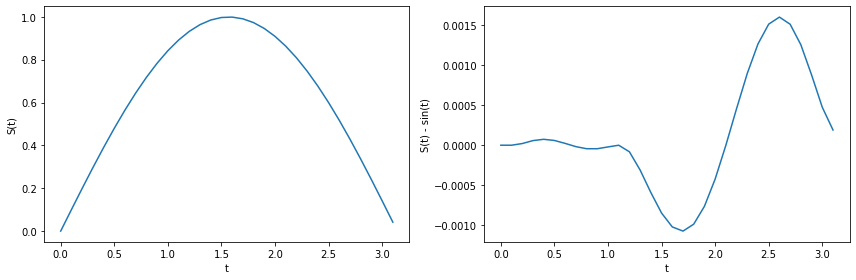

In [15]:
F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The above figure on the left shows the intergration of $\frac{dS(t)}{dt}=cos(t)$ with `solve_ivp`. The right computes the difference between the solution given by `solve_ivp` and the evaluation of the analytical solution to the ODE.

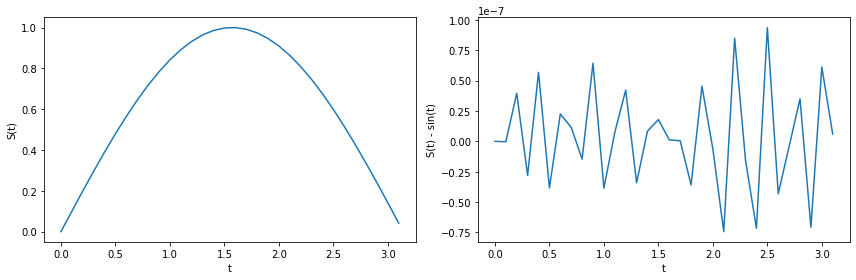

In [16]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Consider the ODE $$\frac{dS(t)}{dt}=-S(t)$$ with $S_0=1$. The exact solution is $S(t)=e^{-t}$. We will use `solve_ivp` to approximate the solution with $t=[0,1]$.

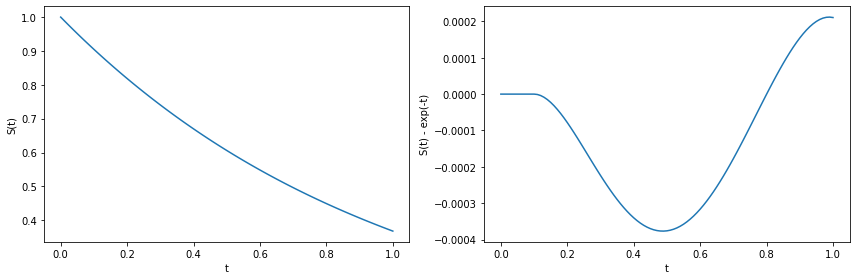

In [17]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

Let the state of a system be defined by $$S(t)= \begin{bmatrix} x(t) \\ y(t) \end{bmatrix}$$ and let the evolution of the system be defined by the ODE $$\frac{dS(t)}{dt} = \begin{bmatrix} 0 & t^2 \\ -t & 0 \end{bmatrix}S(t)$$
We will use `solve_ivp` to solve this ODE for the $t=[0,10]$ with $S_0=\begin{bmatrix} 1 \\ 1 \end{bmatrix}$.

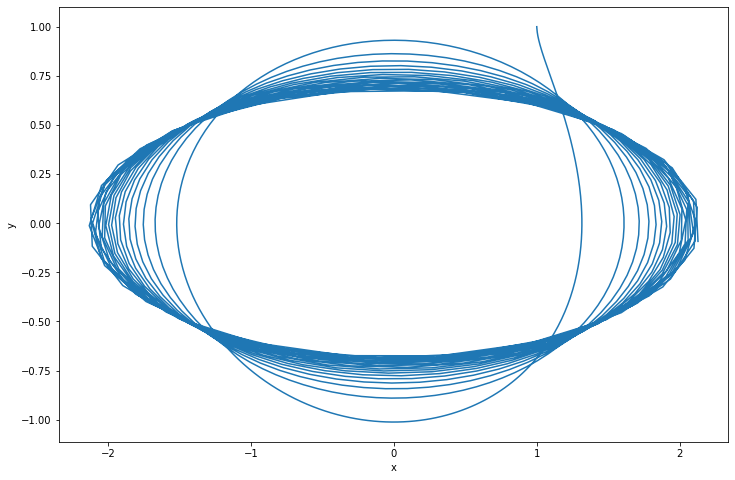

In [18]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()